# Neuronale Netzwerke

## Grundlagen

Ein neuronales Netzwerk kann in vielerlei Hinsichten mit einem Gehirn verglichen werden. Ähnlich wie das Gehirn besteht ein neuronales Netzwerk aus vielen Neuronen. Es gibt verschiedene Arten von Neuronen, die wiederum unterschiedliche Aktivierungsfunktion besitzen. Auf Aktivierungsfunktionen wird in einem späteren Teil der Arbeit genauer eingegangen.
Grundsätzlich besitzt jedes Neuron Eingabezahlen (x1, x2, …) die mit Gewichten (w1, w2, …) verbunden sind. Noch dazu besitzt jedes Neuron ein Bias (b). All diese Faktoren haben Einfluss auf den Ausgabewert eines Neurons. Um diesen zu berechnen, wird die gewichtete Summe der Eingabewerte mit dem Bias addiert. Mathematisch kann diese Berechnung folgendermaßen dargestellt werden: $\sum_{j=1} {w_j x_j + b}$ (vgl. Nielsen, 2015, #Perceptrons) 

Mit einem einzelnen Neuron kann nicht viel angefangen werden, deswegen verbindet man die Neuronen miteinander, wodurch ein neuronales Netzwerk entsteht. Es gibt viele verschiedene Arten von neuronalen Netzwerken, das einfachste davon ist das sogenannte „Feedforward Neural Network“.
Bei dieser Variante werden Informationen kontinuierlich, d.h. ausschließlich von einer Schicht zur nächsthöheren, weitergeleitet. Es kann in drei Teile unterteilt werden: die Eingabeschicht, die verborgenen Schichten und die Ausgabeschicht. (ebd.)


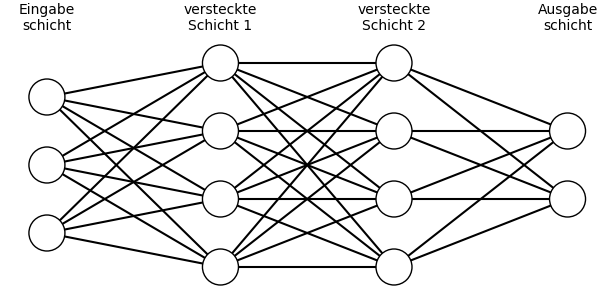

In [1]:
# Zeichne Netzwerk mit Code

from io import BytesIO
import matplotlib.pyplot as plt
from src.erstelle_netzwerk import zeichne_netzwerk
from src.hilfsfunktionen import erstelle_bild

grosse = 6
y_ratio = 0.5
zeichne_netzwerk(grosse, y_ratio, [3, 4, 4, 2])

bild = BytesIO()
plt.savefig(bild, format="png")
bild.seek(0)
plt.close()

erstelle_bild(bild, 500, "Neuronales Netzwerk")


### Die Eingabeschicht

Die Eingabeschicht empfängt die Daten von externen Quellen. Bei einem Zahlenerkennungsmodell beispielsweise würde die Eingabeschicht die Pixeldaten des Bildes repräsentieren. Dementsprechend würde ein 28x28-Bild 784 Eingabeneuronen benötigen. (vgl. Lheureux, o.J.)

### Die verborgenen Schichten

Die verborgenen Schichten sind das, was neuronale Netzwerke so besonders macht. Sie verbinden die Eingabeschicht und die Ausgabeschicht miteinander. Je nach Schwierigkeitsgrad der Anwendung werden mehr und längere verborgene Schichten benötigt. Je mehr verborgene Neuronen es gibt, desto kompliziertere Berechnungen kann das neuronale Netzwerk durchführen. (ebd.)

### Die Ausgabeschicht

Die Ausgabeschicht gibt die endgültige Ausgabe des neuronalen Netzwerkes zurück. In dem Zahlenerkennungsmodell wären das die Ziffern 0 bis 9. (ebd.)

## Vorwärtspropagierung

### Skalarprodukt

In Vorwärtspropagierung werden die Eingabedaten des neuronalen Netzwerkes zur nächsten Schicht weitergegeben, bis sie zur Ausgabeschicht kommen und ein Ergebnis liefern. (vgl. Anshumanm2fja, 2024)

Um das neuronale Netzwerk in der Programmierung umzusetzen, verwende ich die Programmiersprache Python zusammen mit dem Paket „NumPy”. Ein neuronales Netzwerk mit zwei Eingabeneuronen und einem Ausgabeneuron kann wie folgt dargestellt werden:

In [2]:
import numpy as np

eingaben = [0.3, 0.6]
gewichte = [0.8, 0.2]
bias = 4

ausgabe = eingaben[0] * gewichte[0] + eingaben[1] * gewichte[1] + bias
print(ausgabe)

4.36


Im Folgenden wird auch noch die Ausgabe eines neuronalen Netzwerkes mit zwei Eingabeneuronen und zwei Ausgabeneuronen programmatisch umgesetzt.'

In [3]:
eingaben = [1.2, 3.2]
gewichte1 = [0.8, 1.3] # Gewichte zwischen dem ersten Eingabe- und Ausgabeneuron
gewichte2 = [3.1, 1.6] # Gewichte zwischen dem zweiten Eingabe- und Ausgabeneuron

bias1 = 4
bias2 = 3

ausgabe1 = eingaben[0] * gewichte1[0] + eingaben[1] * gewichte1[1] + bias1
ausgabe2 = eingaben[0] * gewichte2[0] + eingaben[1] * gewichte2[1] + bias2
print(ausgabe1, ausgabe2)

9.120000000000001 11.84


Jedoch ist diese Schreibweise sehr mühsam und ineffizient, weswegen zur Berechnung der Ausgabe Vektoren und Matrizen zusammen mit dem Skalarprodukt verwendet werden.

In [4]:
eingaben = [1.2, 3.2]
gewichte = [
    [0.8, 1.3],
    [3.1, 1.6],
]
bias = [4, 3]

ausgabe = np.dot(gewichte, eingaben) + bias
print(ausgabe)

[ 9.12 11.84]


### Batches

Bis jetzt rechnet der Code jeweils nur eine Schicht pro Zyklus (Batch) aus. Um die Effizienz zu steigern, werden pro Zyklus mehrere Batches gemacht; das bietet den Vorteil der Parallelisierung von Operationen. Das Lernen von neuronalen Netzwerken wird in der Praxis mit GPUs (Graphics Processing Units) durchgeführt. GPUs besitzen eine hohe Anzahl an Prozessoren, wodurch auch aufwendige Berechnungen schnell durchgeführt werden können. Eine weitere essenzielle Eigenschaft von Batches ist die Normalisierung. Wenn mehrere Schichten gleichzeitig ausgeführt werden, kann die Schwankung der Ausgabewerte ausbalanciert werden; dadurch wird das Lernen stabiler und konsistenter.
(vgl. Kinsley, 2020, TC: 8:00)

Um Batches zu implementieren, wird die Eingabeliste in eine zweidimensionale Liste konvertiert:

In [5]:
eingaben = [
    [1.2, 3.2],
    [3.2, 1.2],
    [4.2, 0.2],
    [3.1, 2.2],
]

ausgabe = np.dot(gewichte, eingaben) + bias

ValueError: shapes (2,2) and (4,2) not aligned: 2 (dim 1) != 4 (dim 0)

Der Code liefert jetzt allerdings einen Fehler:


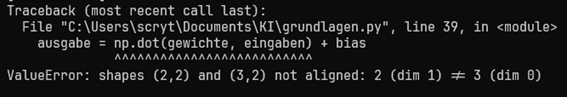

In [6]:
# Zeige den Error Fehler / lade gespeichertes Bild

with open("VWA/Batch-Code-Fehler.png", "rb") as bild_datei:
    erstelle_bild(bild_datei, 500, "Batch-Code-Fehler")

Dieser Fehler tritt auf, da bei der Matrixmultiplikation die Reihenfolge der Parameter zu beachten ist. Wird die Anzahl der Eingabeneuronen auf drei erhöht, so tritt ein ähnlicher Fehler auf. Das hat mit der Durchführung der Matrixmultiplikationen zu tun. Bei dieser werden die Zeilen mit den Reihen multipliziert; da allerdings in diesem Fall die Reihen und die Spalten unterschiedliche Längen haben, können die Multiplikationen nicht durchgeführt werden. Um diesen Fehler zu beheben, muss die Matrix transponiert werden, d.h., Zeilen und Reihen werden vertauscht. (vgl. Kinsley, 2020, TC: 16:26)

In [7]:
transponierte_gewichte = np.array(gewichte).T
ausgabe = np.dot(eingaben, transponierte_gewichte) + bias
print(ausgabe)

[[ 9.12 11.84]
 [ 8.12 14.84]
 [ 7.62 16.34]
 [ 9.34 16.13]]


Um weitere Schichten hinzuzufügen, kann der bereits vorhandene Code wiederverwendet werden. Um dies effizient umzusetzen, bietet es sich an, Klassen zu schreiben. Die Klasse „Schicht” dient hier als Bauplan für alle Schichten, die instanziiert werden, in diesem Fall „schicht1” und „schicht2”.

In [8]:
class Schicht:
    def __init__(self, anzahl_eingaben, anzahl_neuronen):
        self.gewichte = 0.1 * np.random.randn(anzahl_eingaben, anzahl_neuronen)
        self.bias = 0.1 * np.random.randn(1, anzahl_neuronen)

    def vorwaerts(self, eingaben):
        self.gespeicherte_eingaben = eingaben
        ausgaben = np.dot(eingaben, self.gewichte) + self.bias
        return ausgaben


schicht1 = Schicht(2, 4)
schicht2 = Schicht(4, 5)

ausgaben1 = schicht1.vorwaerts(eingaben)
ausgaben2 = schicht2.vorwaerts(ausgaben1)
print(ausgaben2)

[[-0.14672691 -0.02305593 -0.17087976 -0.06118334  0.02274868]
 [-0.09141268 -0.0771616  -0.18754381 -0.00272151 -0.14811562]
 [-0.06375557 -0.10421444 -0.19587583  0.0265094  -0.23354777]
 [-0.1116704  -0.06551888 -0.19740417 -0.00974015 -0.10516319]]


Die Ausgaben der ersten Schicht werden als Eingaben für die zweite Schicht verwendet, um dann mit dieser die Ausgabeneuronen des Netzwerkes zu berechnen.

## Regression vs Klassifizierung

Für die späteren Kapitel ist es wichtig zwischen Regressions und Klassifizierungsprobleme zu unterscheiden. Regression ist eine überwachte Lernmethode Technik. Sie wird verwebdet um kontinuierliche numerische Werte vorherzusagen. Dabei wird eine Beziehung zwischen Eingangsvariablen und Ausgabewerten hergestellt. Typische Anwendungen umfassen zum Beispiel die Vorhersage von Verkaufszahlen, Temperaturen oder Immobilienpreise. (vgl. Saxena, 2024)

Klassifizierung ist ebenfalls eine überwachte Lernmethode setzt sich hingegen damit auseinander, Eingabedaten in diskrete Kategorien einzuteilen. Typische Anwendungen sind Bilderkennung oder Spam-Erkennung. (ebd.)

## Aktivierungsfunktionen

Ein neuronales Netzwerk ist im Wesentlichen eine Funktionsannäherung. Aktivierungsfunktionen ermöglichen es neuronalen Netzwerken, nicht-lineare Beziehungen zwischen Daten zu modellieren. Ein Neuron ohne Aktivierungsfunktion ist eine lineare Funktion. Besteht ein neuronales Netzwerk nur aus solchen Neuronen, dann kann dieses Netzwerk sich nur an lineare Funktionen annähern und besitzt somit nicht die Fähigkeit, komplexere Funktionen wie eine Sinusfunktion zu approximieren. (vgl. Kinsley, 2020, 7:47)


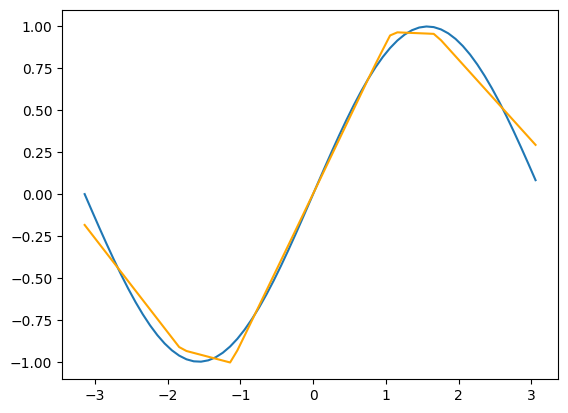

In [9]:
# Zeichne Sinus Funktionsannäherung mit Code

from matplotlib import animation
import matplotlib.pyplot as plt
from src import sin
import numpy as np
from io import BytesIO
from src.hilfsfunktionen import erstelle_bild
import math

sin_eingaben = np.arange(-math.pi, math.pi, 0.1)
sin_eingaben = sin_eingaben.reshape(len(sin_eingaben), 1)
ziele = np.sin(sin_eingaben)

netzwerk,_ = sin.trainiere_netzwerk(sin_eingaben, ziele)

vorhersagen = netzwerk.vorwaerts_durchlauf(sin_eingaben)
plt.plot(sin_eingaben, ziele, label="Wahre Funktion")
plt.plot(sin_eingaben, vorhersagen, label="Neuronales Netzwerk", color="orange")

bild = BytesIO()
plt.savefig(bild, format="png", bbox_inches='tight')
bild.seek(0)
plt.close()

erstelle_bild(bild, 400, "Lineare Funktionsannäherung einer Sinuskurve")

Um dieses Problem zu lösen, werden auf das Ergebnis der Neuronen Aktivierungsfunktionen angewendet. Es gibt verschiedene Arten von Aktivierungsfunktionen, zwei weit verbreitete und beliebte sind die Sigmoid-Funktion und ReLU(rectified linear unit)-Funktion. (vgl. Kinsley, 2020, TC: 7:52)

### Die Sigmoid-Funktion

Die Sigmoid-Funktion ist eine mathematische Funktion, die den Wertebereich zwischen zwei Zahlen, beschränkt und eine S-förmige Kurve bildet. Es gibt verschiedene Varianten der Sigmoid-Funktion. Ein Beispiel dafür ist die Logistische Sigmoid-Funktion. Im Kontext des maschinellen Lernens wird die Logistische Sigmoid-Funktion auch oft als Sigmoid-Funktion bezeichnet. Mathematisch wird diese Funktion durch folgende Gleichung beschrieben:  $\sigma(x) = \frac{1}{1 +e^{-x}}$ (vgl. Topper, 2023)

Um die Aktivierungsfunktion an Schichten von Neuronen anzuwenden, erstelle ich die Klasse „Sigmoid”.

In [20]:
class Sigmoid:
    def vorwaerts(self, eingaben):
        self.gespeicherte_ausgaben = 1 / (1 + np.exp(-eingaben))
        return self.gespeicherte_ausgaben


schicht1 = Schicht(2, 4)
aktivierung1 = Sigmoid()

rohe_ausgaben = schicht1.vorwaerts(eingaben)
aktivierte_ausgaben = aktivierung1.vorwaerts(rohe_ausgaben)
print(aktivierte_ausgaben)

ValueError: shapes (60,) and (2,4) not aligned: 60 (dim 0) != 2 (dim 0)

### Die ReLU-Funktion

Eine weitere Aktivierungsfunktion ist die ReLU-Funktion. Der Vorteil der ReLU-Funktion gegenüber anderen Aktivierungsfunktionen ist ihre Effizienz.
Ihre Funktionsweise ist einfach: Ist ein Wert positiv, wird der Wert beibehalten, ansonsten wird der Wert gleich 0 gesetzt. (vgl. Kinsley, 2020, TC: 9:00)

In [11]:
class ReLU:
    def vorwaerts(self, eingaben):
        self.gespeicherte_eingaben = eingaben
        ausgaben = np.maximum(0, eingaben)
        return ausgaben

### Die Softmax-Funktion

Die Softmax-Funktion ist eine weitere Aktivierungsfunktion, die aber in der Ausgabeschicht bei Klassifizierungsproblemen durchgeführt wird. Sie transformiert die Rohwerte in Wahrscheinlichkeiten, die zusammen 1 ergeben. Dies ermöglicht es, die Ausgaben des neuronalen Netzwerkes als Wahrscheinlichkeiten für die mögllichen Kategorien zu interpretieren. (vgl. Belagatti, 2024)

Die Softmax-Funktion exponiert die Ausgaben mit Hilfe der exponentiellen Funktion $e^y$. Anschließend werden diese Werte normalisiert in dem sie durch die Summe aller exponierte Werte dividiert werden. Die mathematische Formel sieht dann so aus: $a_i = \frac {e^{z_i}} {\sum_{j=1} {e^{z_j}}}$
(ebd.)

So wie bei der der Sigmoid-Funktion und der ReLU-Funktion erstelle ich auch für die Softmax-Funktion eine Klasse.

In [12]:
class Softmax:
    def vorwaerts(self, eingaben):
        exponierte_werte = np.exp(eingaben - np.max(eingaben, axis=1, keepdims=True))
        summe = np.sum(exponierte_werte, axis=1, keepdims=True)
        normalisierte_ausgaben = exponierte_werte / summe
        return normalisierte_ausgaben

## Die Netzwerk-Klasse

Um die verschiedenen Komponenten des neuronalen Netzwerkes, wie die Schichten und Aktivierungsfunktionen, effizient zu verwalten, erstelle ich die Netzwerk Klasse. Die Klasse besteht aus einer Liste von Schichten und einer Liste von Aktivierungsfunktionen. Zusätzlich enthält sie die Methode "vorwaerts_durchlauf" um eine Vorwärtspropagierung  durchzuführen. Dabei wird schichtweise die rohen Ausgaben jeder Schicht berechnet und dann mit der entsprechenden Aktivierungsfunktion aktiviert. Das endgültige Ergebnis in der letzten Schicht ist die Ausgabe des Neuronalen Netzwerkes und wird zurückgegeben. Mit der Methode "schicht_hinzufuegen" werden Schichten und dessen entsprechende Aktivierungsfunktion an dem Netzwerk hinzugefügt.

In [13]:
class Netzwerk:
    def __init__(
        self,
    ):
        self.schichten = []
        self.aktivierungsfunktionen = []

    def schicht_hinzufuegen(self, schicht, aktivierung):
        self.schichten.append(schicht)
        self.aktivierungsfunktionen.append(aktivierung)

    def vorwaerts_durchlauf(self, eingaben):
        aktuelle_eingaben = eingaben
        for schicht, aktivierung in zip(self.schichten, self.aktivierungsfunktionen):
            rohe_ausgaben = schicht.vorwaerts(aktuelle_eingaben)
            aktivierte_ausgaben = aktivierung.vorwaerts(rohe_ausgaben)
            # Aktivierte Ausgaben der Schicht werden zu Eingaben für die nächste Schicht
            aktuelle_eingaben = aktivierte_ausgaben
        return aktivierte_ausgaben


netzwerk = Netzwerk()
netzwerk.schicht_hinzufuegen(
    Schicht(1, 5),  # Eingabeschicht → versteckte Schicht
    ReLU(),  # Aktivierungsfunktion für die versteckte Schicht
)
netzwerk.schicht_hinzufuegen(
    Schicht(5, 2),  # Versteckte Schicht → Ausgabeschicht
    Softmax(),  # Aktivierungsfunktion für die Ausgabeschicht
)

Als Beispiel erstelle ich ein Netzwerk das aus 1 Eingabeneuron, 5 versteckte Neuronen und 2 Ausgabeneuronen besteht.

## Das Zahlungserkennungsmodell

Um ein neuronales Netzwerk zu trainieren, werden Daten benötigt. Für ein Modell, das zu der Erkennung von Zahlen dient, eignet sich die MNIST-Datenbank. MNIST enthält 60.000 Trainingsbilder und 10.000 Testbilder von handgeschriebenen Ziffern und können somit zum Trainieren als auch für die Evaluierung verwendet werden. (vgl. Khan, 2024)

Für mein neuronales Netzwerk verwende ich für die Eingabeschicht 784 Neuronen, da die MNIST Bilder aus 28 mall 28 Pixels bestehen. Ich habe eine verborgene Schicht mit 
20 Neuronen mit der ReLU-Aktivierungsfunktion. Die Ausgabeschicht besteht aus 10 Neuronen, die jeweils die Ziffern 0 bis 9 repräsentieren. Da es sich hier um ein Klassifizierungsproblem handelt, verwende ich für die Ausgabeschicht die Softmax-Funktion.

In [14]:
from daten.lade_daten import lade_test_daten
import random

netzwerk = Netzwerk()
netzwerk.schicht_hinzufuegen(
    Schicht(784, 20),  # Eingabeschicht → versteckte Schicht
    ReLU(),  # Aktivierungsfunktion für die versteckte Schicht
)
netzwerk.schicht_hinzufuegen(
    Schicht(20, 10),  # Versteckte Schicht → Ausgabeschicht
    Softmax(),  # Aktivierungsfunktion für die Ausgabeschicht
)

bilder, beschriftungen = lade_test_daten()
vorhersagen = netzwerk.vorwaerts_durchlauf(bilder) # Als Wahrscheinlichkeitsverteilung

vorhergesagte_ziffern = np.argmax(vorhersagen, axis=1)
ziele = np.argmax(beschriftungen, axis=1)

vergleich = vorhergesagte_ziffern == ziele
richtige_aussagen = sum(vergleich)
genauigkeit = richtige_aussagen / 10_000
print(genauigkeit)

0.1183


Zuerst werden die Bilder und deren Beschriftungen geladen. Anschließend berechnet das neuronale Netzwerk Vorhersagen basierend auf den Bilddaten und gibt diese als Wahrscheinlichkeitsverteilung zurück. Die Ziffer mit der höchsten Wahrscheinlichkeit wird dann mit der tatsächlichen Ziffern verglichen. Um die Genauigkeit zu bestimmen, werden die richtigen Aussagen mit der gesamten Anzahl an Testbildern dividiert. Da das Netzwerk noch nicht trainiert wurde, ist die Genauigkeit sehr niedrig.

# Trainieren eines neuronalen Netzwerkes

## Deep und Shallow Learning

Deep Learning und Shallow Learning sind Teilbereiche des maschinellen Lernens und befassen sich mit dem Trainieren neuronaler Netzwerke. Shallow Learning wird verwendet, flache ("shallow") neuronale Netzwerke zu trainieren, die in der Regel aus zwei oder drei Schichten bestehen. Deep Learning hingegen wird bei tiefen ("deep") neuronale Netzwerke angewendet, um Netzwerke mit mehr als zwei versteckten Schichten zu trainieren. (vgl. Lodhi, o.J.)

Flache neuronale Netzwerke sind aufgrund ihrer vereinfachten Architektur schneller und einfacher zu trainieren. Allerdings eignen sie sich daher weniger gut für komplexe Probleme. Tiefe Netzwerke hingegen können durch ihre komplexe Struktur anspruchsvolle Probleme lösen, erfordern jedoch zusätzliche Methoden um Problemen wie Überanpassung zu vermeiden. (ebd.)

Bei dem im vorherigen Kapitel angesprochenen Zahlungserkennungsmodell handelt es sich um ein flaches neuronales Netzwerk, da es nur eine versteckte Schicht besitzt.

## Die Verlust- und Kostenfunktion

Die Begriffe Verlustfunktion und Kostenfunktion werden oft synonym verwendet, haben jedoch grundlegend verschiedene Bedeutungen. Die Verlustfunktion ("Loss Function") dient dazu, die Leistung einer einzelnen Vorhersage zu bewerten. Sie berechnet mithilfe der Vorhersage und dem tatsächlichen Zielwert den Fehler des Netzwerkes für einen einzelnen Trainingsbeispiel. (vgl. Alake, o.J.)

Die Kostenfunktion ("Cost Funktion") hingegen ist der mittellwert der Verlustfunktion für das gesamte Trainingsset. Sie berechnet die Gesamtleistung des neuronalen Netzwerkes und ist essenziell für das Training. In den späteren Kapiteln wird deutlich, wie sie zur Optimierung des Netzwerkes genutzt wird. Das Ziel des Netzwerkes ist es, die Kosten zu minimieren, um die Genauigkeit der Vorhersagen zu verbessern. (ebd.)

Es gibt verschiedene Arten von Kostenfunktionen, die jenach Aufgabe oder Problem in zwei Kategorien eingeteilt werden können: Kostenfunktionen für Regressionsprobleme und Kostenfunktionen für Kategorisierungsprobleme. (ebd.)

### Kostenfunktionen für Regressionsprobleme

Typische Kostenfunktionen für Regressionsprobleme sind der der mittlerer absoluter Fehler (Mean Absolute Error) und der mittlerer quadratischer Fehler (Mean Squared Error). Beim mittleren absoluten Fehler wird der mittelwert die absoluten Differenzen zwischen der Vorhersage und dem tatsächlichen Zielwert berechnet. Mathematisch wird sie so dargestellt: ${\frac {1} {n}} {\sum_{i=1}^{n} |y_i - \hat{y_i}}|$, wobei n für die Anzahl an Trainingsbeispielen ist, $y_i$ für einen vorhergesagten Wert für ein bestimmtes Trainingsbeispiel ist und $\hat{y_i}$ der tatsächliche Zielwert für dieses Trainingsbeispiel. (ebd.)

Beim mitleren quadratischen Fehler hingegen werden die quadratische Differenzen zwischen Vorhersage und dem tatsächlichen Zielwert berechnet. Mathematisch sieht das so aus: ${\frac {1} {n}} {\sum_{i=1}^{n} (y_i - \hat{y_i})^2}$. Durch die quadratisierung werden größere Differenzen stärker bestraft. (ebd.)

Der Huber Loss ist eine Kombination aus mittleren absoluten Fehler und mittleren quadratischen Fehler die weniger empfindlich auf Ausreißer reagiert und dessen Formel sieht so aus: $L(\delta, y, f(x)) =  \begin{cases}
{\frac {1} {2}} (f(x)-y)^2 & \text if |f(x) - y| \le \sigma \\
\sigma |f(x)-y| - {\frac {1} {2}} \sigma^2 & \text if |f(x) - y| \gt \sigma
\end{cases}$ (ebd.)

### Kostenfunktionen für Klassifizierungsprobleme

Typische Verlustfunktionen für Klassifizierungsprobleme sind der Binary Cross-Entropy Loss

In [19]:
vorhersagen = np.array([0.6, 0.3])
ziele = np.array([1, 0])

verluste = np.square(vorhersagen - ziele)
kost = np.mean(verluste)
print(kost)

0.125


In [16]:
class MittlererQuadratischerFehler:
    def verlust(vorhersagen, ziele):
        return np.mean(np.square(vorhersagen - ziele))

    def rueckwaerts(vorhersagen, ziele):
        return 2 * (vorhersagen - ziele) / len(vorhersagen)
    
    
class Kreuzentropie():
    def verlust(vorhersagen, ziele):
        vorhersagen = np.clip(vorhersagen, 1e-7, 1 - 1e-7)
        return -np.mean(np.sum(ziele * np.log(vorhersagen), axis=1))

    def rueckwaerts(vorhersagen, ziele):
        return (vorhersagen - ziele) / len(vorhersagen)

## Gradient Descent


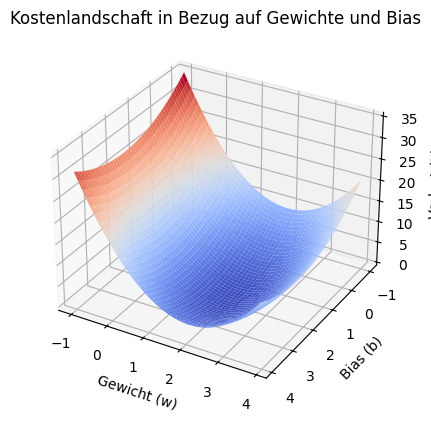

In [17]:
# Zeichne Kostenlandschaft mit Code

import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return 2 * x + 2


eingaben = np.arange(-3, 3, 0.1)
ziele = f(eingaben)


def berechne_kostenfunktion_auf_gewicht_bias(gewichte, bias):
    vorhersagen = gewichte * eingaben + bias
    verlust = MittlererQuadratischerFehler.verlust(vorhersagen, ziele)
    return verlust


def berechne_gradient(gewicht, bias):
    vorhersagen = gewicht * eingaben + bias
    verlust_gradient = MittlererQuadratischerFehler.rueckwaerts(vorhersagen, ziele)

    gradient_gewicht = np.dot(eingaben.T, verlust_gradient)
    gradient_bias = np.sum(verlust_gradient)
    return [gradient_gewicht, gradient_bias]


def zeichne_landschaft():
    gewichtsbereich = np.arange(-1, 4, 0.1)
    biasbereich = np.arange(-1, 4, 0.1)
    gewichte, bias = np.meshgrid(gewichtsbereich, biasbereich)
    verluste = np.array(
        [
            [
                berechne_kostenfunktion_auf_gewicht_bias(gewicht, bias_wert)
                for gewicht in gewichtsbereich
            ]
            for bias_wert in biasbereich
        ]
    )

    ax.plot_surface(
        gewichte,
        bias,
        verluste,
        cmap="coolwarm",
    )  # Kostenlandschaft


fig = plt.figure()
ax = fig.add_subplot(111, projection="3d", computed_zorder=False)

zeichne_landschaft()

# Achsentitel
ax.set_title("Kostenlandschaft in Bezug auf Gewichte und Bias")
ax.set_xlabel("Gewicht (w)")
ax.set_ylabel("Bias (b)")
ax.invert_yaxis()
ax.set_zlabel("Verlust (L)")

bild = BytesIO()
plt.savefig(bild, format="png", bbox_inches='tight')
bild.seek(0)
plt.close()

erstelle_bild(bild, 400, "Kostenlandschaft in Bezug auf Gewichte und Bias")


## Backpropagation

# Literaturverzeichnis

Alake, Richmond (o.J.): Loss Functions in Machine Learning Explained. https://www.datacamp.com/tutorial/loss-function-in-machine-learning [Zugriff: 31.01.2025]

Anshumanm2fja (2024): What is Forward Propagation in Neural Networks? https://www.geeksforgeeks.org/what-is-forward-propagation-in-neural-networks/ [Zugriff: 16.10.2024]

Belagatti, Pavan (2024): Understanding the Softmax Activation Function: A Comprehensive Guide. https://www.singlestore.com/blog/a-guide-to-softmax-activation-function/ [Zugriff: 01.02.2025]

Bhayani, Arpit (o.J.): Genetic algorithm to solve the Knapsack Problem. https://arpitbhayani.me/blogs/genetic-knapsack/ [Zugriff: 16.12.2024]

Kanade, Vijay (o.J.): What Are Genetic Algorithms? Working, Applications, and Examples. https://www.spiceworks.com/tech/artificial-intelligence/articles/what-are-genetic-algorithms/ [Zugriff: 16.12.2024]

Khan, Azim (2024) A Beginner’s Guide to Deep Learning with MNIST Dataset. https://medium.com/@azimkhan8018/a-beginners-guide-to-deep-learning-with-mnist-dataset-0894f7183344 [Zugriff: 14.01.2025]

Kinsley, Harrison (2020) Neural Networks from Scratch - P.4 Batches, Layers, and Objects. https://www.youtube.com/watch?v=TEWy9vZcxW4 [Zugriff: 16.10.2024]

Kinsley, Harrison (2020): Neural Networks from Scratch - P.5 Hidden Layer Activation Functions. https://www.youtube.com/watch?v=gmjzbpSVY1A [Zugriff: 16.10.2024]

Lheureux, Adil (o.J.): Feed-forward vs feedback neural networks. https://www.digitalocean.com/community/tutorials/feed-forward-vs-feedback-neural-networks [Zugriff: 16.10.2024]

Lodhi Ramlakhan (o.J.): Difference between Shallow and Deep Neural Networks. https://www.geeksforgeeks.org/difference-between-shallow-and-deep-neural-networks/ [Zugriff: 31.01.2025]

Mitchell, Melanie (1996): An Introduction to Genetic Algorithms. Fifth printing. Cambridge, Massachusetts: The MIT Press.

Nielsen, Michael (2015): Neural Networks and Deep Learning. http://neuralnetworksanddeeplearning.com/chap1.html [Zugriff: 16.10.2024]

Saxena, Abhimanyu (2024): Classification vs Regression in Machine Learning. https://www.appliedaicourse.com/blog/classification-vs-regression-in-machine-learning/ [Zugriff: 01.02.2025]

Topper, Noah (2023): Sigmoid Activation Function: An Introduction. https://builtin.com/machine-learning/sigmoid-activation-function [Zugriff: 14.01.2025]

<!-- BIBLIOGRAPHY START -->
<div class="csl-bib-body">
</div>
<!-- BIBLIOGRAPHY END -->


# Abbildungsverzeichnis

In [18]:
# Erstelle Abbildungsverzeichnis mit Code

from IPython.display import display, HTML
from src.hilfsfunktionen import zitierungen 

for zitierung in zitierungen:
    html = f"""<a href=#{zitierung[1]} style=" color: var(--jp-content-font-color1);">{zitierung[0]}</a>"""
    display(HTML(html))